Edge detection step by step, following https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

In [1]:
import numpy as np
from scipy import ndimage
import imageio
import visvis as vv

ModuleNotFoundError: No module named 'visvis'

In [12]:
im = imageio.volread('/Volumes/ElementsSE/thesisData/FCCbatch/FCC_Sigma0_HHHV_20190412.tif')

In [13]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [14]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [15]:
ndimage?

In [17]:
sobel_filters(im)

RuntimeError: filter weights array has incorrect shape.

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [11]:
im2 = cv.imread('../processed/Sigma0_20200418/WinsvoldGRD_Sigma0_Subset_Orb_TN_Cal__S1B_IW_GRDH_1SDH_20200418T101605_20200418T101630_021197_028396_5FA1.data/Sigma0_HH_db.img', -1)

In [12]:
print (im2)

None


In [19]:
fp = "/Volumes/ElementsSE/thesisData/FCCs/sigma0_HHHV_12Apr2019.tif"
img = plt.imread(fp,0)#, cv.IMREAD_LOAD_GDAL)

OSError: cannot identify image file '/Volumes/ElementsSE/thesisData/FCCs/sigma0_HHHV_12Apr2019.tif'

In [20]:
import rasterio as rio
import matplotlib.pyplot as plt
import rasterio.warp as warp
import rasterio.plot as rioPlt

In [21]:
img = rio.open('/Volumes/ElementsSE/thesisData/FCCbatch/FCC_Sigma0_HHHV_20190424.tif')

In [23]:
type(img)

rasterio.io.DatasetReader

In [24]:
array_orig_firstBand = img.read(1)
array_orig_firstBand.shape

(19114, 21189)

In [26]:
array_orig_firstBand

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

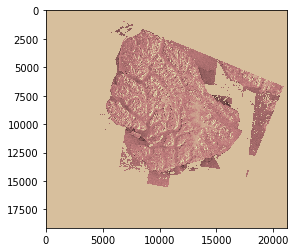

In [25]:
plt.imshow(array_orig_firstBand, cmap='pink')


In [1]:
#cv.imshow('Pic', array_orig_firstBand)
#cv.waitKey(5000)

In [4]:
print(cv.getBuildInformation())


General configuration for OpenCV 4.2.0 =====================================
  Version control:               4.2.0-dirty

  Platform:
    Timestamp:                   2020-04-04T15:48:58Z
    Host:                        Darwin 17.7.0 x86_64
    CMake:                       3.15.5
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/make
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3 SSSE3
      requested:                 DETECT
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (14 files):         + SSE4_1
      SSE4_2 (1 files):          + SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (27 files):           + SSE4_1 POPCNT SSE4_2 FP16 FMA3 AVX AVX2
      AVX512_SKX (3 files

In [30]:
cv.imshow('First FCC', img)
cv.waitKey(5000)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'
